In [23]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, r2_score



## Ejercicio 1:

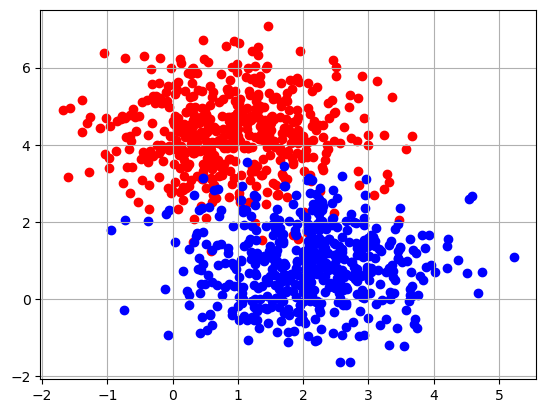

In [24]:

# Generar dos grupos de datos aleatorios con dos atributos
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, cluster_std=1, random_state=0)

# Graficar los puntos de cada grupo con diferentes colores
plt.scatter(X[np.argwhere(y==0), 0], X[np.argwhere(y==0), 1], color='red')
plt.scatter(X[np.argwhere(y==1), 0], X[np.argwhere(y==1), 1], color='blue')

plt.grid()


In [25]:
X[np.argwhere(y==0)]= X[np.argwhere(y==0)]+3

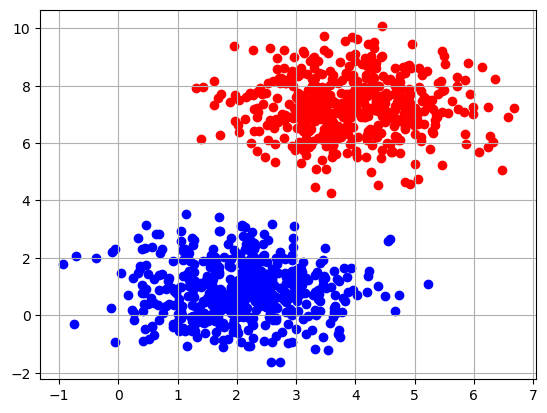

In [26]:
# Graficar los puntos de cada grupo con diferentes colores
plt.scatter(X[np.argwhere(y==0), 0], X[np.argwhere(y==0), 1], color='red')
plt.scatter(X[np.argwhere(y==1), 0], X[np.argwhere(y==1), 1], color='blue')

plt.grid()

In [27]:
X= MinMaxScaler().fit_transform(X)

In [28]:
class Perceptron():
    def __init__(self,n_inputs=2, n_outputs=1, W=None,  b=None):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.W = W
        self.b = b
        
        if self.W is None:
            self.W = np.random.rand(self.n_outputs, self.n_inputs)-0.5
        if self.b is None:
            self.b = np.random.rand(self.n_outputs, 1)-0.5

  

    def predict(self, x):
        return np.sign(self.W @ x.T + self.b).T.astype(int)
    def train(self, X, D):
        if np.sum(self.predict(X) == D) != D.shape[0]:
            continuar = True
            p=0
            while continuar:
                v = p % X.shape[0]
                x = X[v].reshape(1,-1)
                y = self.predict(x)
                d= D[v].reshape(1,-1)
                
                if y!=d:
                    self.W += d*x
                    self.b += d
                    if np.sum(self.predict(X) == D) == D.shape[0]:
                        continuar = False
                p += 1
        return
    def get_params(self):
        return self.W, self.b

In [29]:
y[np.argwhere(y==0)] = -1

In [30]:
ps = Perceptron(n_inputs=2, n_outputs=1)
ps.train(X, y.reshape(-1,1))

In [31]:
ps.W, ps.b

(array([[-0.48461411, -2.67205361]]), array([[1.46785809]]))

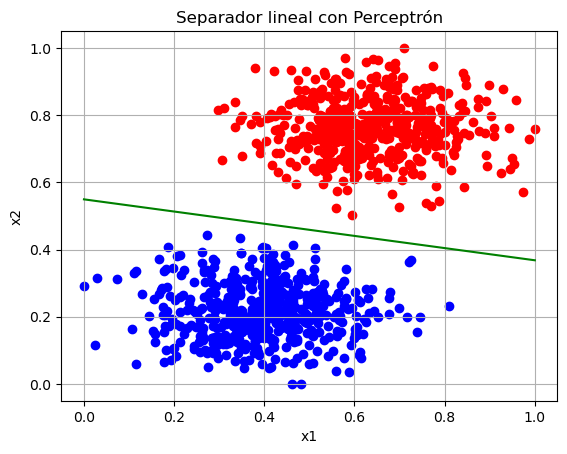

In [32]:
pesos, bias = ps.get_params()


plt.scatter(X[np.argwhere(y==1),0], X[np.argwhere(y==1),1], c='b')
plt.scatter(X[np.argwhere(y==-1),0], X[np.argwhere(y==-1),1], c='r')

plt.grid()
plt.title('Separador lineal con Perceptrón')
plt.xlabel('x1')
plt.ylabel('x2')
#plt.xlim((0,1))
#plt.ylim((0,1))

x1=np.array([0.0, 1.0])
x2=np.array([-bias[0,0]/pesos[0,1],(-bias[0,0]-pesos[0,0])/pesos[0,1]])
plt.plot(x1, x2, c='green')
plt.show()

## Ejercicio 2:

In [33]:
from sklearn.datasets import load_boston
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [34]:
datos_boston = load_boston()

In [35]:
X_boston = MinMaxScaler().fit_transform(datos_boston.data)
y_boston = datos_boston.target
X_boston.shape, y_boston.shape


((506, 13), (506,))

In [36]:
# Ahora defino las particiones que se van a realizar en la validacion
# cruzada 

kf = KFold(n_splits = 10)

# Y tambien el regresor lineal con las condiciones que nos dice el enu
# nciado de la practica

reg = SGDRegressor(tol=1e-6, max_iter=5000)

In [42]:
reg_table= pd.DataFrame(columns=['R2','Accuracy'])
reg_table.index.name="Fold"

j = 0
for train_index, test_index in kf.split(X_boston):
    reg = SGDRegressor(tol=1e-6, max_iter=5000)
    reg.fit(X_boston[train_index], y_boston[train_index])
    y_predict = reg.predict(X_boston[test_index])
    error = np.mean(np.abs((y_predict - y_boston[test_index])/y_boston[test_index]) < 0.15)
    reg_table.loc[j,:]= [r2_score(y_boston[test_index],y_predict),error]
    j+=1
reg_table

,R2,Accuracy
Fold,,
0,0.768257,0.705882
1,0.649231,0.764706
2,-0.12983,0.745098
3,0.61483,0.607843
4,0.594136,0.588235
5,0.704288,0.686275
6,0.445079,0.66
7,0.092009,0.22
8,-0.46629,0.34


In [43]:
# AHora creamos el codigo necesario
reg_table.mean()

R2          0.370047
Accuracy    0.593804
dtype: float64

In [44]:
reg_table.std()

R2          0.407442
Accuracy    0.177217
dtype: float64